# Projeto de Resolução de Equações não-lineares

## Descrição do problema

![](thermistor.jpeg)

Os termistores são dispositivos de medição de temperatura baseados no princípio de que o material do termistor exibe uma alteração na resistência elétrica com uma alteração na temperatura. Medindo a resistência do material do termistor, pode-se determinar a temperatura. Para um termistor 10K3A Betatherm, a relação entre a resistência $R$ do termistor e a temperatura é dada por:

$$\frac{1}{T} = 1.129241\times 10^{-3} + 2.341077\times 10^{-4} ln(R) +8.775468\times 10^{-8} \times (ln(R))^3 $$ 

onde $T$ é a temperatura em Kelvin e $R$ a resistência em Ohms.

Podemos reescrever a equação acima na forma $f(x) = 0$:

$$1.129241\times 10^{-3} + 2.341077\times 10^{-4} ln(R) +8.775468\times 10^{-8} \times (ln(R))^3 - \frac{1}{T} = 0$$

Dessa forma dada um temperatura T, podemos descobrir o valor de R correspondente através de um método de solução de equações não lineares (Bisseção, Cordas, Newton-Raphson, Secante)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Resolução

O primeiro passo para poder resolver esse problema vamos definir uma função que modela o thermistor para uma determinada Temperatura.

In [2]:
def equacao(R,T=19): # A Temperatura é fixa em 19°C para essa análise
    return 1.129247e-3+2.341077e-4*np.log(R) + 8.775468e-8*np.log(R)**3-1/(T+273.15)

Uma observação importante é a conversão da unidade da Temperatura de Kelvin para Celsius, onde basta somar $273.15$ 

# Análise Gráfica

Sabendo que o thermistor opera próximo da faixa de 10K Ohms, traçamos um gráfico entre 8K e 15K para analisar o comportamento da função

In [3]:
r = np.arange(8000,15000,1)
y = equacao(r,19) # A temperatura é fixa em 19º C

<function matplotlib.pyplot.show(*args, **kw)>

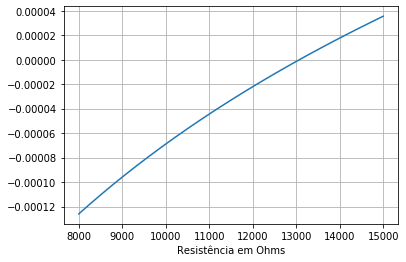

In [4]:
plt.plot(r,y)
plt.grid(True)
plt.xlabel("Resistência em Ohms")
plt.show

# Análise através de um método intervalar

Como método intervalar foi escolhido o método da bisseção pois ele possui a garantia de convergência quando ao menos uma raiz está isolada no intervalo 

In [5]:
def bissecao(fnc, a, b, es, max_it=100):
    xm = []
    erro = []
    for i in range(max_it):
        xm.append((a+b)/2)
        if fnc(a)*fnc(xm[-1]) < 0:
            b = xm[-1]
        else:
            a = xm[-1]
        if i!=0:
            erro.append(np.abs((xm[i]-xm[i-1])/xm[i])*100)
            if erro[-1] <= es:
                return xm, erro
        

In [6]:
raiz, e = bissecao(equacao,8000, 15000, 0.005, 1000)
len(raiz)

14

Após 14 iterações o método convergiu para um erro de aproximação menor do que o estipulado de $0.005$

In [7]:
raiz

[11500.0,
 13250.0,
 12375.0,
 12812.5,
 13031.25,
 13140.625,
 13085.9375,
 13058.59375,
 13072.265625,
 13065.4296875,
 13068.84765625,
 13070.556640625,
 13071.4111328125,
 13071.83837890625]

O método encontrou o valor de $R = 13071.8383$ Ohms para a temperatura de 19°C. Podemos conferir se o valor está correto substituindo de volta na equação e verificando se o valor se aproxima de zero.

In [8]:
equacao(raiz[-1])

-6.7127105896416794e-09

### Trançando o gráfico do erro

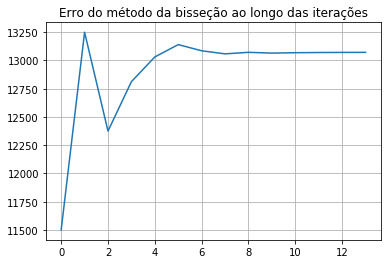

In [9]:
plt.plot(raiz)
plt.title("Erro do método da bisseção ao longo das iterações")
plt.grid(True)

# Análise através de um método aberto

Para a análise utilizando um método aberto foi escolhido o método da **secante** pois possui uma rápida convergência similar ao método de Newton sem a necessidade do cálculo simbólico da derivada da função

In [10]:
def secante(f,x0,x1,es=0.005,max_it=100):
    x = []
    erro = []
    x.append(x0)
    x.append(x1)
    for i in range(1,max_it):
        xn = x[i] - f(x[i])*(x[i]-x[i-1])/(f(x[i])-f(x[i-1]))
        x.append(xn)
        erro.append(np.abs((x[-1]-x[-2])/x[-1])*100)
        if erro[-1] <= es:
            return x,erro

Utilizando como $x_0 = 8000$ e $x_1 = 15000$ e os mesmo critérios de parada do método anterior foi possível, após 6 iterações obter o resultado abaixo 

In [11]:
raiz_secante, erro_secante = secante(equacao,8000, 15000,0.005,1000)
len(raiz_secante)

6

In [12]:
raiz_secante

[8000,
 15000,
 13460.912504549442,
 13044.868606523172,
 13072.575167592257,
 13072.179214614003]

O método encontrou o valor de $R = 13072.1792$ Ohms para a temperatura de 19°C. Podemos conferir se o valor está correto substituindo de volta na equação e verificando se o valor se aproxima de zero.

In [13]:
equacao(raiz_secante[-1])

8.00870871356385e-12

### Trançando o gráfico do erro

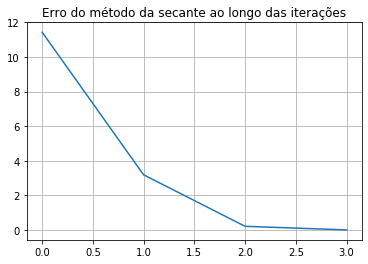

In [14]:
plt.plot(erro_secante)
plt.title("Erro do método da secante ao longo das iterações")
plt.grid(True)

# Conclusão

Através dos métodos de resolução de equações não lineares (bisseção e secante) foi possível criar um modelo de confiança para obter o valor de resistência de um thermistor para um temperatura específica a partir de uma equação fornecida pelo fabricante. A facilidade dos métodos evita a necessidade de manipular e resolver uma equação complexa para a obtenção dos resultados. 